<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Mass Transfer and Reaction Paths</h1><h2>Feature demo: reacting fluids with minerals</h2></td>
</tr>
</table>
</left>

This notebook demonstrates various features related to mass transfer calculations.

In the example below, the fluids in `fluids.csv` are speciated and then reacted with the minerals forsterite and fayalite.

Many different kinds of data are produced from the calculation that can be visualized with interactive plots. Most of these plots show how mineral masses or fluid compositions change as a function of reaction progress (Xi).

Load the Python package.

In [1]:
import aqequil

Load the thermodynamic database.

Organics are excluded here to cut down on calculation time.

In [2]:
ae = aqequil.AqEquil(exclude_organics=True)

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding ['organic_aq', 'organic_cr'] from column 'category_1'in wrm_data_latest.csv
wrm_data_latest.csv is now set as the active thermodynamic database.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column 'category_1'in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column 'category_1'in wrm_data_logk_s.csv
Loading thermodynamic database into pyCHNOSZ...


In the next step, three different water samples are speciated from `fluids.csv`. The formation of certain minerals can be suppressed here, if desired. The commented-out line shows how to suppress greenalite and goethite.

In [3]:
speciation = ae.speciate(input_filename="fluids.csv",
#                          alter_options=[["greenalite", "Suppress"], ["goethite", "Suppress"]],
                         )

The input file column 'logfO2' will be used to set sample redox state. If a another column is desired, set it manually using the redox_flag parameter.
Getting wrm_data_latest.csv ready. This will take a moment...
No 'charge_balance_on' column found in input file. Defaulting to no charge balancing for all samples.
Using wrm_data_latest.csv to speciate forstfay_1
Using wrm_data_latest.csv to speciate forstfay_2
Using wrm_data_latest.csv to speciate forstfay_3
Finished!


Select which minerals to react. A number of other parameters, like the amount (moles) remaining, can be defined here too.

Tip: run `aqequil.Reactant?` in an empty cell to get information about the various parameters that can be modified.

In [4]:
forsterite = aqequil.Reactant(reactant_name="forsterite",
                              amount_remaining=1, # moles of mineral to react
                              f_rate_law='Relative rate equation', # forward rate law
                              f_eq1=0.02, # dXi(n)/dXi (mol/mol)
                              b_rate_law="Partial equilibrium", # backward rate law
                             )

fayalite = aqequil.Reactant(reactant_name="fayalite",
                            amount_remaining=1,
                            f_rate_law='Relative rate equation',
                            f_eq1=0.98,
                            b_rate_law="Partial equilibrium",
                            )

# combine the mineral reactants in a list to repare the reaction
r = aqequil.Prepare_Reaction(reactants=[forsterite, fayalite], write_tab=0)

React the minerals with the speciated fluids.

In [5]:
speciation = aqequil.react(speciation, r)

Using wrm_data_latest.csv to react forstfay_1
Using wrm_data_latest.csv to react forstfay_2
Using wrm_data_latest.csv to react forstfay_3


Select one of the three samples, `forstfay_1`, for analysis and plotting.

In [6]:
# get mass transfer data for a sample
m = speciation.mt("forstfay_1")

## Available plot types

Plot pH as a function of reaction progress (Xi)

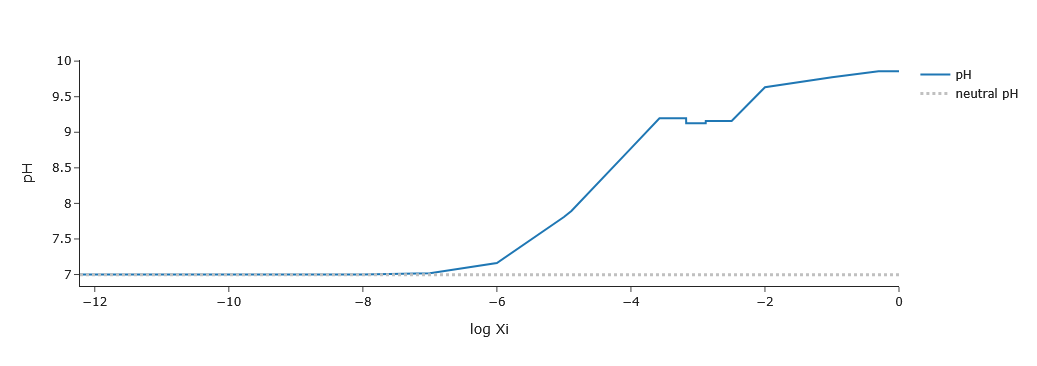

In [7]:
m.plot_pH()

Plot concentrations of dissolved elements as a function of reaction progress (Xi)

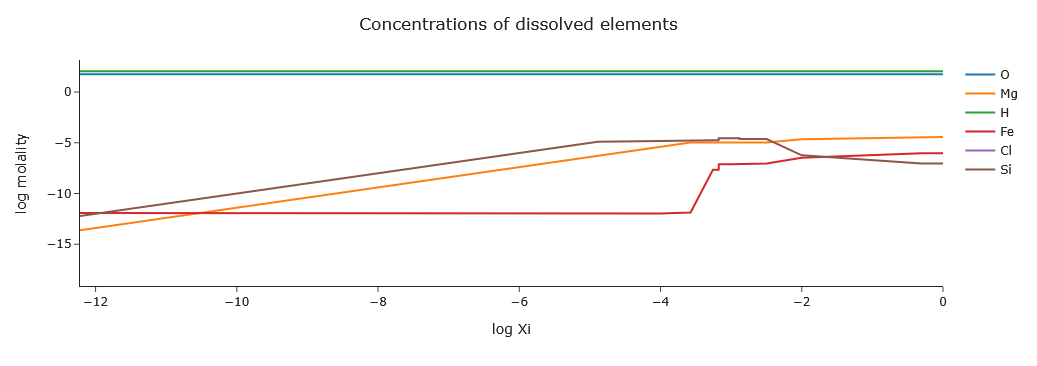

In [8]:
m.plot_elements(log=True)

Plot activity of aqueous basis species as a function of reaction progress (Xi)

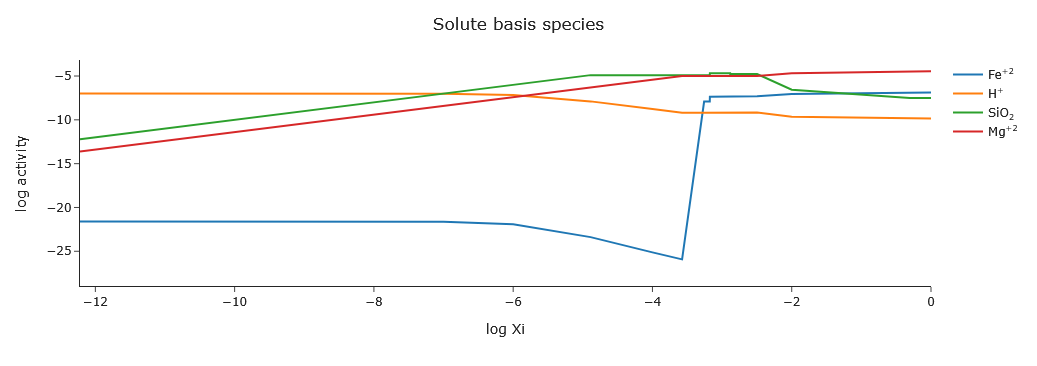

In [9]:
m.plot_aqueous_species(plot_basis=True)

Plot activity of non-basis aqueous species as a function of reaction progress (Xi)

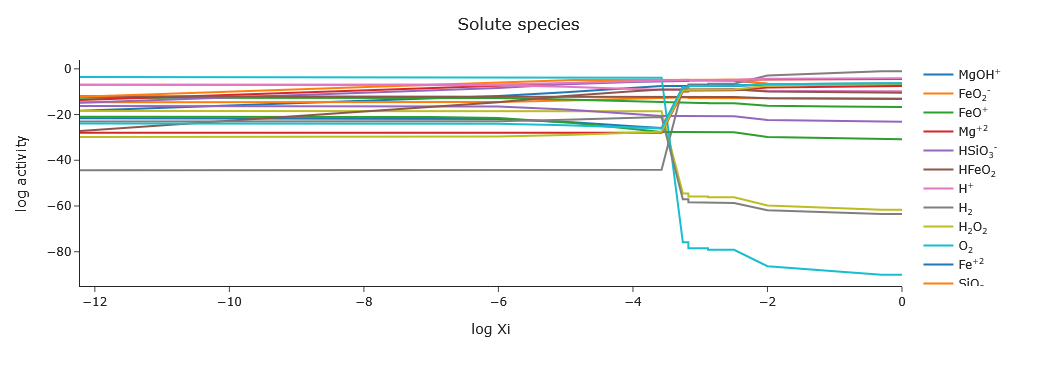

In [10]:
m.plot_aqueous_species(plot_basis=False)

Plot moles of product minerals as a function of reaction progress (Xi)

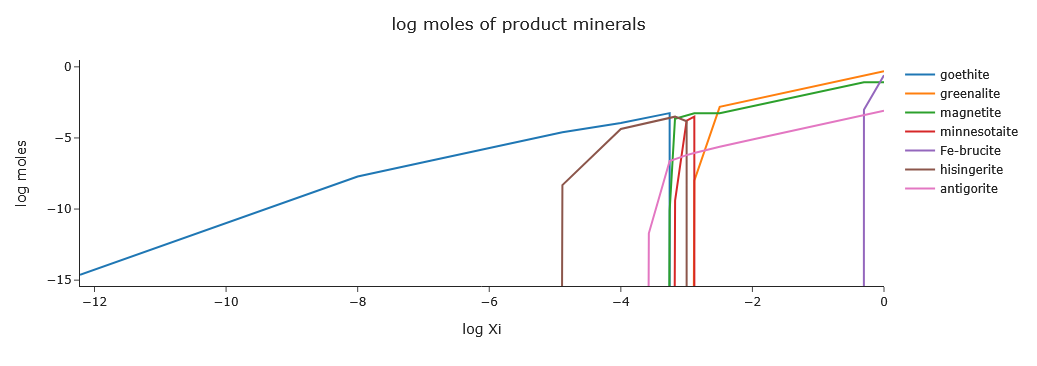

In [11]:
m.plot_product_minerals(show_reactant_minerals=False)

Create an interactive reaction path diagram with desired species as x, y, and balance variables. (It might take a minute to load the plot.)

Once it is ready, hover your mouse over the plot to see more.

The red line and dots indicate the reaction path of the fluid. Open circles represent 'projections', where the point is above or below the plane in multidimensional space. An example of this is at Xi=0 in the plot below (you can hover over points to see values of Xi). At this value of Xi, the fluid appears in the Fe-brucite field but this mineral is not actually forming according to the moles of product mineral plot (above).

Closed circles indicate points along the reaction path that are interacting with activity fields and/or saturation lines present in the diagram. For instance, the second point along the reaction path (Xi=6.01741e-13, or log Xi=-12.22059) is in magnetite field and is touching the goethite saturation line. Magnetite does not form at this value of Xi, but goethite does (see the plot of moles of product mineral, above).

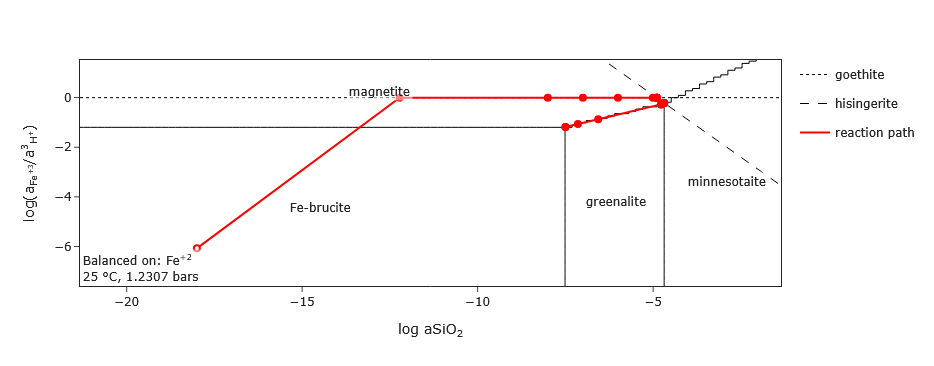

In [12]:
e = m.plot_reaction_paths(["SiO2", "Fe+3", "Fe+2"], # x, y, and balance variables
                          res=100, # 100 calculations per axis. Higher is slower but makes smoother region lines.
                          colormap="bw", # black and white colormap
                         )[0].show()

Plot reaction paths with all permutations of x, y, and balance variables. (Takes a long time.)

In [13]:
fig_list = m.plot_reaction_paths(path_margin=0.25, # amount of space around the reaction path
                                 res=25, # resolution of background mineral stability field
                                 flip_xy=True, # flip variables on x and y axes?
                                 colormap="bw", # colormap name
                                 plot_width=4, # in inches
                                 plot_height=3, # in inches
                                 path_line_color = "red", # reaction path styling
                                 path_point_fill_color = "red", # reaction path styling
                                 path_point_line_color = "red", # reaction path styling
                                 projected_point_fill_color = "white", # reaction path styling
                                 projected_point_line_color = "red", # reaction path styling
                                 show_nonparticipating_mineral_lines=False, # show mineral lines even if they aren't formed?
                                 )

_ = [fig.show() for fig in fig_list]

Plot mass contribution of a basis species across reaction progress (Xi).

In this case, how does the speciation of ferrous iron change with Xi?

In [14]:
m.plot_mass_contribution("Fe+2")

## Tables

Print a list of available tables.

In [15]:
m.print_tabs()

Table B1 Miscellaneous parameters I
Table B2 Miscellaneous parameters II
Table C1 Dissolved elements(molality)
Table C2 Dissolved elements(ppm: mg/kg.sol)
Table C3 Dissolved elements(molarity)
Table C4 Dissolved elements(ppm: mg/L)
Table D1 Solute basis species(total molality)
Table D2 Solute basis species(total ppm: mg/kg.sol)
Table D3 Solute basis species(total molarity)
Table D4 Solute basis species(total ppm: mg/L)
Table E1 Basis species(log true molality; log mole fraction for H2O  log fugacity for O2(g))
Table E2 Basis species(log activity; log fugacity for O2(g))
Table E3 Basis species(log activity coefficient)
Table J Moles of reactants destroyed/created
Table K Affinities of reactants (kcal)
Table P Moles of product minerals
Table Q Saturation indices of potential product phases
Table T Fugacities (bars)
Table W Overall mass and volume changes


Display Table P by copy-pasting its full name from the list above

In [16]:
m.tab["Table P Moles of product minerals"]

,Xi,t(days),goethite,hisingerite,antigorite,magnetite,minnesotaite,greenalite,Fe-brucite
0,0.000,0.000,None,None,None,None,None,None,None
1,6.0174E-13,0.000,2.4190E-15,None,None,None,None,None,None
2,1.0000E-08,0.000,1.9599E-08,None,None,None,None,None,None
3,1.0000E-07,0.000,1.9600E-07,None,None,None,None,None,None
4,1.0000E-06,0.000,1.9600E-06,None,None,None,None,None,None
5,1.0000E-05,0.000,1.9600E-05,None,None,None,None,None,None
6,1.2936E-05,0.000,2.5346E-05,4.7963E-09,None,None,None,None,None
7,1.0000E-04,0.000,1.1063E-04,4.2683E-05,None,None,None,None,None
8,2.6647E-04,0.000,2.7370E-04,1.2428E-04,1.9607E-12,None,None,None,None
9,5.5192E-04,0.000,5.5582E-04,2.6296E-04,2.3812E-07,7.5576E-11,None,None,None


Display Table D1 in the same way

In [17]:
m.tab["Table D1 Solute basis species(total molality)"]

,Xi,t(days),H+,Mg+2,SiO2,Fe+2
0,0.000,0.000,-1.1579E-09,1.0000E-18,1.0000E-18,1.0000E-18
1,6.0174E-13,0.000,-1.1603E-09,2.4071E-14,6.0174E-13,1.1770E-12
2,1.0000E-08,0.000,-1.9602E-09,4.0000E-10,1.0000E-08,1.1762E-12
3,1.0000E-07,0.000,-9.1602E-09,4.0000E-09,1.0000E-07,1.1687E-12
4,1.0000E-06,0.000,-8.1160E-08,4.0000E-08,1.0000E-06,1.1093E-12
5,1.0000E-05,0.000,-8.0116E-07,4.0000E-07,1.0000E-05,1.0021E-12
6,1.2936E-05,0.000,-1.0361E-06,5.1746E-07,1.2927E-05,9.9926E-13
7,1.0000E-04,0.000,-8.0012E-06,4.0000E-06,1.4633E-05,1.0978E-12
8,2.6647E-04,0.000,-2.1318E-05,1.0659E-05,1.7897E-05,1.3312E-12
9,5.5192E-04,0.000,-2.1340E-05,1.0647E-05,1.7900E-05,2.2166E-08


Display a table of the log activity of aqueous species at different values of Xi. The `.head()` means only the first five rows are displayed in the notebook.

In [18]:
m.aq_distribution_logact.head()

,Xi,MgOH+,FeO2-,FeO+,Mg+2,HSiO3-,HFeO2,H+,H2,H2O2,...,Fe+2,SiO2,Fe+3,FeO,FeOH+2,MgHSiO3+,OH-,HO2-,HFeO2-,FeOH+
0,0.000000e+00,-22.6832,-20.6944,-18.7238,-18.0007,-20.5863,-18.0921,-7.0000,-44.3227,-18.4091,...,-27.6721,-18.0011,-27.0741,-34.0773,-22.2787,-37.3270,-6.9950,-23.0931,-35.8790,-29.9869
1,6.017410e-13,-18.3017,-14.6236,-12.6530,-13.6192,-14.8069,-12.0213,-7.0000,-44.3227,-18.4091,...,-21.6013,-12.2217,-21.0033,-28.0065,-16.2079,-27.1661,-6.9950,-23.0931,-29.8082,-23.9161
2,1.000000e-08,-14.0794,-14.6219,-12.6547,-9.3986,-10.5847,-12.0213,-7.0017,-44.3227,-18.4091,...,-21.6047,-8.0011,-21.0083,-28.0065,-16.2112,-18.7233,-6.9933,-23.0914,-29.8065,-23.9178
3,1.000000e-07,-13.0644,-14.6069,-12.6697,-8.3986,-9.5697,-12.0213,-7.0167,-44.3227,-18.4091,...,-21.6346,-7.0012,-21.0533,-28.0065,-16.2413,-16.7083,-6.9783,-23.0764,-29.7915,-23.9328
4,1.000000e-06,-11.9207,-14.4629,-12.8137,-7.3988,-8.4262,-12.0213,-7.1607,-44.3223,-18.4095,...,-21.9225,-6.0016,-21.4853,-28.0063,-16.5292,-14.5650,-6.8343,-22.9328,-29.6473,-24.0766


Documentation is available for any function by including `?` at the end of the function name. For instance, here is the documentation for the `aqequil.Reactant` function used earlier in the notebook to define forsterite and fayalite as minerals to react with speciated fluids:

In [19]:
aqequil.Reactant?

Init signature:
aqequil.Reactant(
    reactant_name,
    reactant_type='Pure mineral',
    reactant_status='Reacting',
    amount_remaining=1,
    amount_destroyed=0,
    molar_volume=0,
    surface_area_option=0,
    surface_area_value=0,
    surface_area_factor=0,
    f_rate_law='Relative rate equation',
    f_eq1=1,
    f_eq2=0,
    f_eq3=0,
    b_rate_law='Partial equilibrium',
    b_eq1=1,
    b_eq2=0,
    b_eq3=0,
    special_reactant_dict={},
    hide_traceback=True,
)
Docstring:      <no docstring>
Init docstring:
Class used to define reactants for `Prepare_Reaction`.

Parameters
----------
reactant_name : str
    Name of the reactant.

reactant_type : str, default "Pure mineral"
    Reactant type. Valid types include:
    
    - Pure mineral
    - Solid solution
    - Special reactant
    - Aqueous species
    - Gas species
    - Generic ion exchanger

reactant_status : str, default "Reacting"
    Status of the reactant. Valid statuses include:
    
    - Reacting
    - Satura